## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-users-dataset/telecom_users.csv


## Data Preprocessing

### About the data

In [6]:
df = pd.read_csv('/kaggle/input/telecom-users-dataset/telecom_users.csv')
print('shape is : ', df.shape)
df.head()

shape is :  (5986, 22)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Data has no null variables so that is great.</br>

We do not need some of these columns in both data analysis and prediction approaches.

Also 'Yes' and 'No' is not ideal to have a classification model so I will change them to 1 = 'Yes' and 0 = 'No'.

### Dropping columns

In [8]:
df = df.drop(['Unnamed: 0', 'customerID'], axis=1)
df = df.replace('No', 0)
df = df.replace('Yes', 1)
df = df.replace('No internet service', 0)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,1,1,72,1,1,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


### Encoding categorical values

In [10]:
df['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
0              1291
Name: InternetService, dtype: int64

Internet service:

Fiber optic = 2
DSL = 1

In [11]:
df['InternetService'] = df['InternetService'].replace('Fiber optic', 2)
df['InternetService'] = df['InternetService'].replace('DSL', 1)

In [12]:
df['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

Contract:

'Month-to-month' = 1
'Two Year' = 24
'One Year' = 12

In [13]:
df['Contract'] = df['Contract'].replace('Two year', 24)
df['Contract'] = df['Contract'].replace('One year', 12)
df['Contract'] = df['Contract'].replace('Month-to-month', 1)

In [14]:
df['PaymentMethod'].value_counts()


Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

Payment Method:

'Electronic Check' = 1
'Mailed Check' = 2
'Bank Transfer' = 3
'Credit Card' = 4

In [15]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 1)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 2)
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 3)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 4)

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)

Gender:
Female : 0 Male : 1

In [16]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

Also as you can see on the above, we can change the contract, internet service and payment method types as well without changing column purpose. I labeled them accordingly so I will be showing these labels when we are visualizing the data.

And finally, I do think that montly and total charge values can be integers. They are determinant factors but their fraction values are not that important.

In [17]:
df['MultipleLines'] = df['MultipleLines'].astype(int)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(str)

In [18]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
total_charge = df['TotalCharges']

In [19]:
for i in range(0, len(df)-1):
    total_charge[i] = int(total_charge[i])
df['TotalCharges'] = df['TotalCharges'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Updated DF

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,4,24,1734,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88,3973,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74,2869,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,1,55,238,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,1,53,119,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5986 non-null   int64
 1   SeniorCitizen     5986 non-null   int64
 2   Partner           5986 non-null   int64
 3   Dependents        5986 non-null   int64
 4   tenure            5986 non-null   int64
 5   PhoneService      5986 non-null   int64
 6   MultipleLines     5986 non-null   int64
 7   InternetService   5986 non-null   int64
 8   OnlineSecurity    5986 non-null   int64
 9   OnlineBackup      5986 non-null   int64
 10  DeviceProtection  5986 non-null   int64
 11  TechSupport       5986 non-null   int64
 12  StreamingTV       5986 non-null   int64
 13  StreamingMovies   5986 non-null   int64
 14  Contract          5986 non-null   int64
 15  PaperlessBilling  5986 non-null   int64
 16  PaymentMethod     5986 non-null   int64
 17  MonthlyCharges    5986 non-null  

Now the data is ready. Every column is in integer form. I will be looking for correlations of the columns with the Churn and if I find any uncorrelated columns I will drop them.

## EDA

<AxesSubplot:xlabel='Partner', ylabel='MonthlyCharges'>

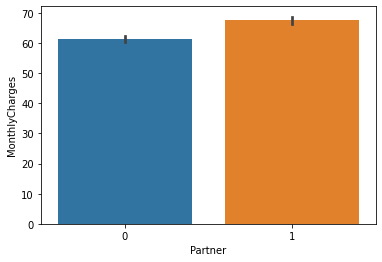

In [22]:
sns.barplot(x='Partner', y='MonthlyCharges', data=df)

Text(0, 0.5, 'Charge')

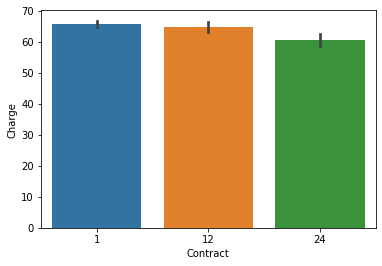

In [23]:
sns.barplot(x='Contract', y='MonthlyCharges', data=df)
plt.ylabel('Charge')

Text(0.5, 0, 'Non senior - Senior')

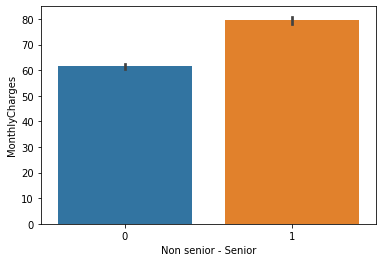

In [24]:
sns.barplot(x='SeniorCitizen', y='MonthlyCharges', data=df)
plt.xlabel('Non senior - Senior')

Text(0.5, 0, 'No Internet - DSL - Fiber optic')

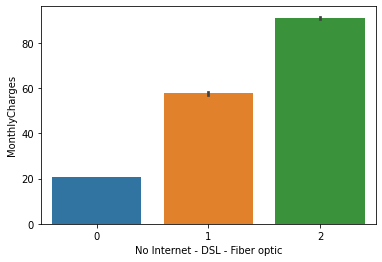

In [25]:
sns.barplot(x='InternetService', y='MonthlyCharges', data=df)
plt.xlabel('No Internet - DSL - Fiber optic')

### Observations

Having a partner or not having a partner does not effect the monthly charges that much, the effect is very minimal.

Contract year effects monthly costs. The contract with the most length has the lowest prices because of the commitment of the customer.

Senior citizens pays more than non senior citizens. That might be because younger people use more internet so their contracts have more throughput.

Fiber optic is the fastest and most reliable internet right now. It is not surprise that it is the most expensive one.

## Correlations

In [26]:
corr = df.corr()

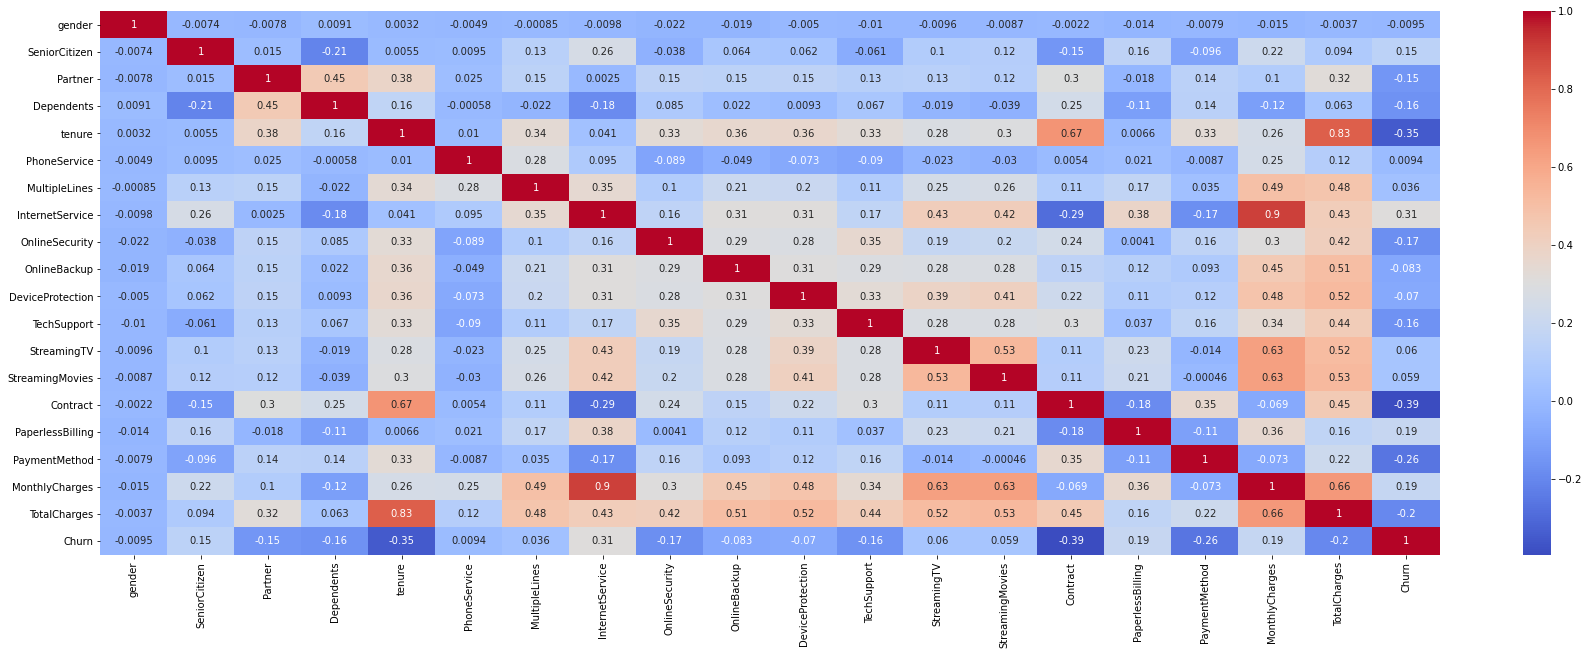

In [27]:
plt.figure(figsize=(30,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

I will not be looking each column one by one. I will choose the most correlated ones and use them in my models.

In [28]:
corr[abs(corr['Churn']) > 0.1].index

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Usig most correalted columsn

In [29]:
df = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [30]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,0,0,0,24,0,4,24,1734,0
1,0,0,0,44,2,0,0,1,1,4,88,3973,0
2,1,1,0,38,2,0,0,1,1,3,74,2869,1
3,0,0,0,4,1,0,0,1,1,1,55,238,0
4,0,0,0,2,1,1,0,1,0,1,53,119,0


## Splitting the dataset

In [31]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [32]:
x.shape, y.shape

((5986, 12), (5986,))

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Models

### Logictic Regression

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       895
           1       0.62      0.50      0.56       303

    accuracy                           0.80      1198
   macro avg       0.73      0.70      0.71      1198
weighted avg       0.79      0.80      0.79      1198



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


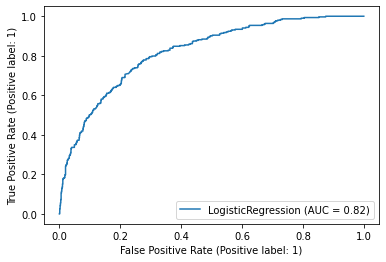

In [34]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print(classification_report(y_test,prediction_lr))
metrics.plot_roc_curve(logistic, x_test, y_test)

### Decision Tree

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       895
           1       0.47      0.50      0.48       303

    accuracy                           0.73      1198
   macro avg       0.65      0.65      0.65      1198
weighted avg       0.74      0.73      0.73      1198



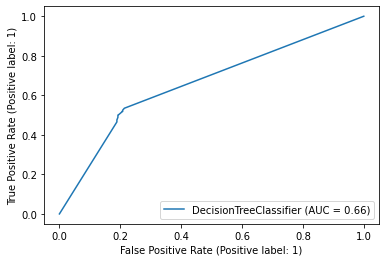

In [35]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
prediction_dt = tree.predict(x_test)
print(classification_report(y_test, prediction_dt))
metrics.plot_roc_curve(tree, x_test, y_test)

### Random Forests

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       895
           1       0.60      0.48      0.54       303

    accuracy                           0.79      1198
   macro avg       0.72      0.69      0.70      1198
weighted avg       0.78      0.79      0.78      1198



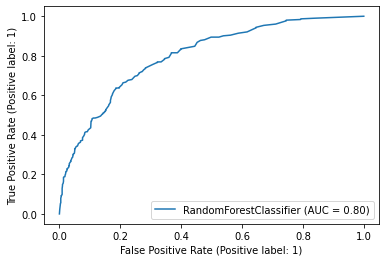

In [36]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
prediction_rf = forest.predict(x_test)
print(classification_report(y_test, prediction_rf))
metrics.plot_roc_curve(forest, x_test, y_test) 

### ANN

In [37]:
model = Sequential([
    Dense(32, activation='relu', input_dim=12),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(x_train, y_train, batch_size=10, epochs=50,verbose=2)

Epoch 1/50
479/479 - 1s - loss: 0.2769 - accuracy: 0.7218
Epoch 2/50
479/479 - 0s - loss: 0.2684 - accuracy: 0.7308
Epoch 3/50
479/479 - 0s - loss: 0.2684 - accuracy: 0.7272
Epoch 4/50
479/479 - 0s - loss: 0.2549 - accuracy: 0.7362
Epoch 5/50
479/479 - 0s - loss: 0.2470 - accuracy: 0.7412
Epoch 6/50
479/479 - 0s - loss: 0.2418 - accuracy: 0.7462
Epoch 7/50
479/479 - 0s - loss: 0.2351 - accuracy: 0.7531
Epoch 8/50
479/479 - 0s - loss: 0.2349 - accuracy: 0.7481
Epoch 9/50
479/479 - 0s - loss: 0.2314 - accuracy: 0.7467
Epoch 10/50
479/479 - 0s - loss: 0.2285 - accuracy: 0.7504
Epoch 11/50
479/479 - 0s - loss: 0.2187 - accuracy: 0.7558
Epoch 12/50
479/479 - 0s - loss: 0.2217 - accuracy: 0.7546
Epoch 13/50
479/479 - 0s - loss: 0.2124 - accuracy: 0.7655
Epoch 14/50
479/479 - 0s - loss: 0.2143 - accuracy: 0.7625
Epoch 15/50
479/479 - 0s - loss: 0.2094 - accuracy: 0.7657
Epoch 16/50
479/479 - 0s - loss: 0.2097 - accuracy: 0.7625
Epoch 17/50
479/479 - 0s - loss: 0.2068 - accuracy: 0.7598
Epoch 

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


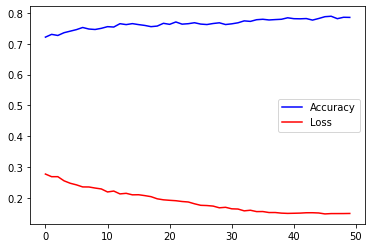

In [40]:
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.plot(history.history['loss'], label='Loss', color='red')
plt.legend()

#### Confuiosn Matrix

In [41]:
prediction_nn = model.predict(x_test)
prediction_nn = [1 if y>=0.5 else 0 for y in prediction_nn]
print(classification_report(y_test, prediction_nn))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       895
           1       0.79      0.20      0.32       303

    accuracy                           0.78      1198
   macro avg       0.79      0.59      0.60      1198
weighted avg       0.79      0.78      0.73      1198



We achieved around %80 accuracy with different models. If we do some feature engineering after the preprocess maybe we can increase the accuracy little bit more.